In [79]:
import pandas as pd
import geopy.distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [80]:
data=pd.read_csv('uber.csv')

data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


{'whiskers': [<matplotlib.lines.Line2D at 0x29b0118f050>,
 'caps': [<matplotlib.lines.Line2D at 0x29b0118f800>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b0118eb10>],
 'medians': [<matplotlib.lines.Line2D at 0x29b0118fe00>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b02e840e0>],
 'means': []}

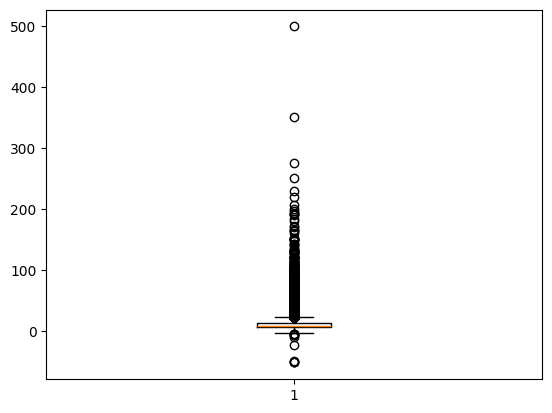

In [81]:
plt.boxplot(data["fare_amount"])


In [82]:
q1=data['fare_amount'].quantile(0.25)
q3=data['fare_amount'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['fare_amount']>=LB) & (data['fare_amount']<=UB) ]
data.shape


(182833, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x29b7e325070>,
 'caps': [<matplotlib.lines.Line2D at 0x29b7e3260c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b7e324e00>],
 'medians': [<matplotlib.lines.Line2D at 0x29b01178740>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b011792e0>],
 'means': []}

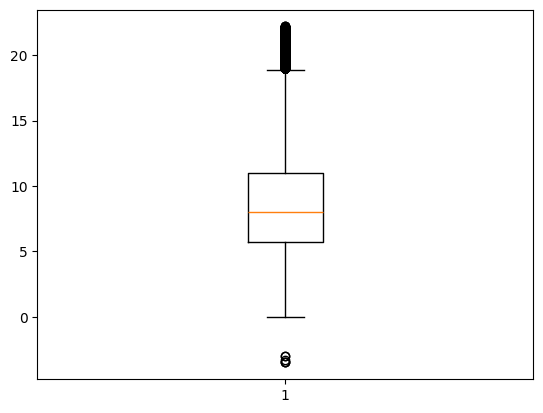

In [83]:
plt.boxplot(data["fare_amount"])

In [84]:
data.drop(['passenger_count','Unnamed: 0','key'],axis=1,inplace=True)

In [85]:
data.info()

data.isnull().sum()

data=data.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 182833 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        182833 non-null  float64
 1   pickup_datetime    182833 non-null  object 
 2   pickup_longitude   182833 non-null  float64
 3   pickup_latitude    182833 non-null  float64
 4   dropoff_longitude  182833 non-null  float64
 5   dropoff_latitude   182833 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.8+ MB


In [86]:
data=data[~((data['pickup_latitude']==data['dropoff_latitude'])&(data['pickup_longitude']==data['dropoff_longitude']))]
print(f'After dropping the data, the final shape is {data.shape}')

After dropping the data, the final shape is (177704, 6)


In [87]:
data=data[~(data['fare_amount']<0)]
print(f'After dropping the data, the final shape is {data.shape}')

After dropping the data, the final shape is (177698, 6)


In [88]:
data = data[(data.pickup_latitude<90) & (data.dropoff_latitude<90) &
        (data.pickup_latitude>-90) & (data.dropoff_latitude>-90) &
        (data.pickup_longitude<180) & (data.dropoff_longitude<180) &
        (data.pickup_longitude>-180) & (data.dropoff_longitude>-180)]

In [89]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)

data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month
data['weekday'] = data.pickup_datetime.dt.weekday
data['hour'] = data.pickup_datetime.dt.hour

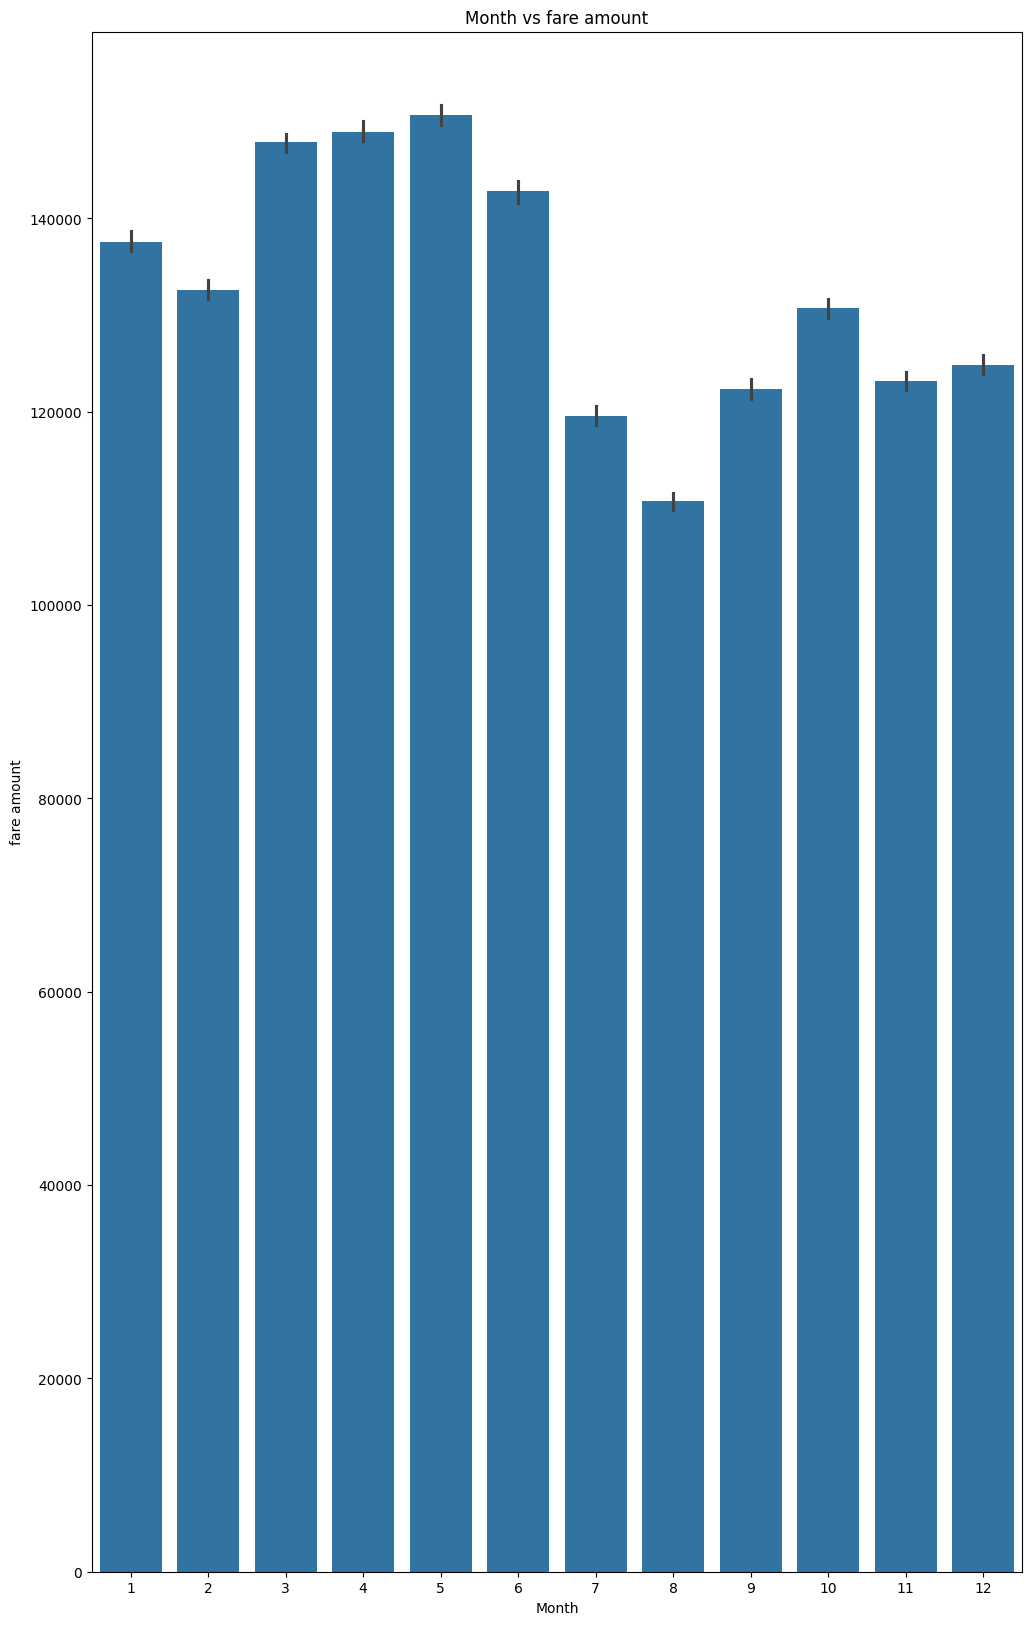

In [91]:



plt.figure(figsize=(12,20))
plt.title('Month vs fare amount')
sns.barplot(x=data['month'],y=data['fare_amount']/1000,estimator=sum)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

In [ ]:
data['distance']=[round(geopy.distance.distance((data.pickup_latitude[i], data.pickup_longitude[i]),(data.dropoff_latitude[i], data.dropoff_longitude[i])).m,2) for i in data.index]

In [ ]:
data.drop(['pickup_datetime','month', 'hour'], axis=1, inplace=True)

In [ ]:
original_data = data.copy(deep=True)

In [ ]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,weekday,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,2015,3,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2009,4,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,2009,0,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,2009,4,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,2014,3,4483.73


{'whiskers': [<matplotlib.lines.Line2D at 0x29b7d83e510>,
 'caps': [<matplotlib.lines.Line2D at 0x29b7d83eab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b7d83e030>],
 'medians': [<matplotlib.lines.Line2D at 0x29b7d83f0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b7d83f380>],
 'means': []}

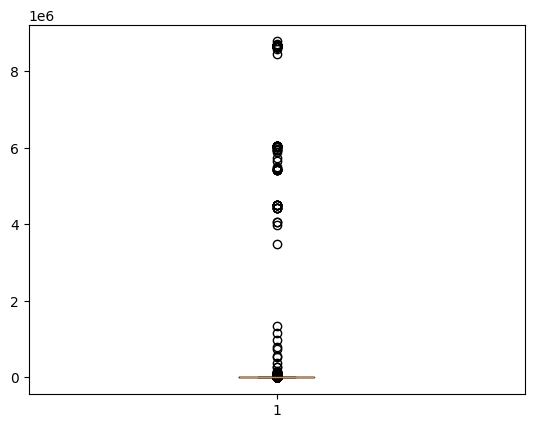

In [ ]:
plt.boxplot(data["distance"])

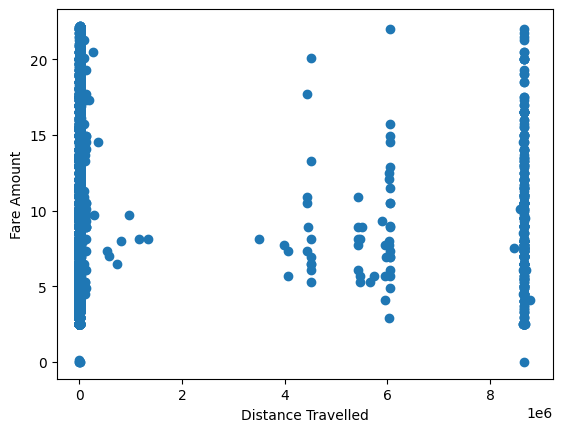

In [ ]:
plt.scatter(data['distance'],data['fare_amount'])
plt.xlabel('Distance Travelled')
plt.ylabel('Fare Amount')
plt.show()

In [ ]:
q1=data['distance'].quantile(0.25)
q3=data['distance'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['distance']>=LB) & (data['distance']<=UB) ]
data.shape

(169652, 8)

In [ ]:
q1=data['fare_amount'].quantile(0.25)
q3=data['fare_amount'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['fare_amount']>=LB) & (data['fare_amount']<=UB) ]
data.shape

(165419, 8)

In [ ]:
data.describe()

data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace= True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165419 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        165419 non-null  float64
 1   pickup_longitude   165419 non-null  float64
 2   pickup_latitude    165419 non-null  float64
 3   dropoff_longitude  165419 non-null  float64
 4   dropoff_latitude   165419 non-null  float64
 5   year               165419 non-null  int32  
 6   weekday            165419 non-null  int32  
 7   distance           165419 non-null  float64
dtypes: float64(6), int32(2)
memory usage: 10.1 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
for column in data.columns:
  if data[column].dtype=='object':
    data[column] = LabelEncoder.fit_transform(data[column].astype(str))

In [ ]:
scaler = StandardScaler()
features_to_scale = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','distance']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

x=data.drop('fare_amount',axis=1)
y=data['fare_amount']

In [ ]:
x.head

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred_xgb_train=xgb_model.predict(x_train)
xgb_model_mse_train=mean_squared_error(y_train,y_pred_xgb_train)

y_pred_xgb_test=xgb_model.predict(x_test)
xgb_model_mse_test=mean_squared_error(y_test,y_pred_xgb_test)

In [ ]:
print(f'Mean Squared Error of train(Xgboost Regression): {xgb_model_mse_train}')
print(f'Mean Squared Error of test (Xgboost Regression): {xgb_model_mse_test}')

Mean Squared Error of train(Xgboost Regression): 2.43831651094713
Mean Squared Error of test (Xgboost Regression): 2.826900943879227


In [ ]:
import pickle

filename = "XGboost.pkl"
pickle.dump(xgb_model, open(filename, "wb"))


data.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,weekday,distance
0,7.5,-0.030638,0.016865,-0.030974,0.010690,2015,3,-0.398120
1,7.7,-0.028491,0.012789,-0.029087,0.021598,2009,4,0.165082
2,12.9,-0.032691,0.017837,-0.016455,0.030580,2009,0,2.048058
3,5.3,-0.021327,0.037986,-0.017536,0.042934,2009,4,-0.412447
4,16.0,-0.001245,0.019171,-0.020588,0.025993,2014,3,1.643187
